In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

# Specify the correct encoding
movie_data = pd.read_csv(r"C:\Users\gadhv\OneDrive\Desktop\Internship\IMDB Movies.csv", engine="python", encoding='latin1')
# Continue with your data processing
movie_data.dropna(inplace=True)
movie_data.head(10)


,ï»¿Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [3]:
movie_data.shape

(5659, 10)

In [4]:
movie_data.describe

<bound method NDFrame.describe of                                   ï»¿Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi) -2019.0  109 min   
3                                 #Yaaram -2019.0  110 min   
5                    ...Aur Pyaar Ho Gaya -1997.0  147 min   
6                               ...Yahaan -2005.0  142 min   
8                      ?: A Question Mark -2012.0   82 min   
...                                   ...     ...      ...   
15493                              Zubaan -2015.0  115 min   
15494                            Zubeidaa -2001.0  153 min   
15503                     Zulm Ki Zanjeer -1989.0  125 min   
15505                               Zulmi -1999.0  129 min   
15508                        Zulm-O-Sitam -1998.0  130 min   

                           Genre  Rating  Votes         Director  \
1                          Drama     7.0      8    Gaurav Bakshi   
3                Comedy, Romance     4.4     35       Ovais Khan   
5         Comedy,

In [5]:
movie_data.isnull().any()

ï»¿Name     False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director    False
Actor 1     False
Actor 2     False
Actor 3     False
dtype: bool

In [6]:
movie_data.value_counts()

ï»¿Name                             Year     Duration  Genre                      Rating  Votes  Director         Actor 1            Actor 2              Actor 3             
#Gadhvi (He thought he was Gandhi)  -2019.0  109 min   Drama                      7.0     8      Gaurav Bakshi    Rasika Dugal       Vivek Ghamande       Arvind Jangid           1
Naya Andaz                          -1956.0  142 min   Romance                    5.8     12     K. Amarnath      Kishore Kumar      Meena Kumari         Kumkum                  1
Number Game                         -2018.0  117 min   Horror, Mystery, Thriller  6.3     10     Sumit Sinha      Aishwaryaa Rajesh  Nakul Choudharry     Rimi                    1
Noukadubi                           -2011.0  135 min   Drama, Romance             7.6     845    Rituparno Ghosh  Jisshu Sengupta    Riya Sen             Raima Sen               1
Notebook                            -2019.0  115 min   Drama, Romance             6.9     2,253  Nitin Ka

In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿Name   5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB


In [8]:
#Any Object Convert into Int in DataTypes 
movie_data['Year'] = movie_data['Year'].astype('category').cat.codes

In [9]:
movie_data['Duration'] = movie_data['Duration'].astype('category').cat.codes

In [10]:
movie_data['Genre'] = movie_data['Genre'].astype('category').cat.codes

In [11]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿Name   5659 non-null   object 
 1   Year      5659 non-null   int8   
 2   Duration  5659 non-null   int16  
 3   Genre     5659 non-null   int16  
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int16(2), int8(1), object(6)
memory usage: 381.3+ KB


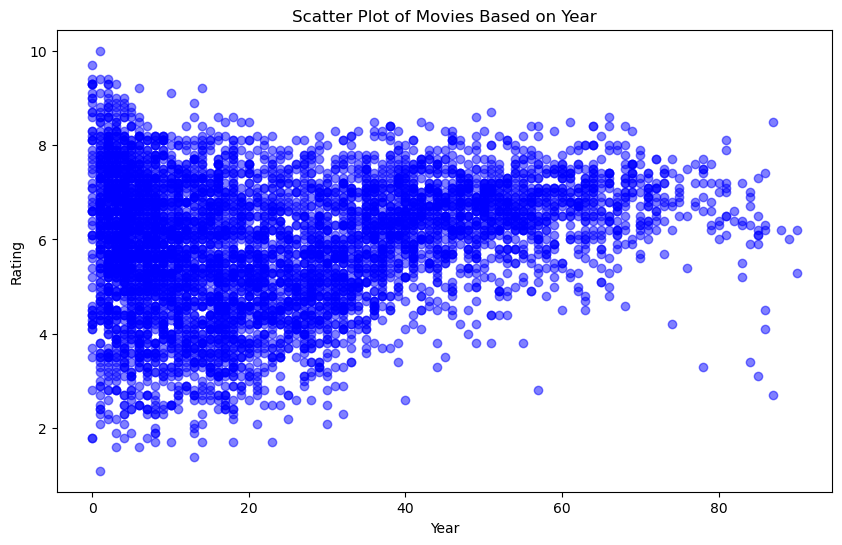

In [12]:
years = movie_data['Year']
ratings = movie_data['Rating']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(years, ratings, alpha=0.5, color='blue')
plt.title('Scatter Plot of Movies Based on Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [13]:
print(movie_data.columns)

columns_to_drop=['Actor 1']
movie_data= movie_data.drop(columns_to_drop, axis=1)

Index(['ï»¿Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [14]:
print(movie_data.columns)

Index(['ï»¿Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 2', 'Actor 3'],
      dtype='object')


In [15]:
movie_data['Votes']=movie_data.Votes.fillna("9")
movie_data.Votes.isnull().sum()

0

In [16]:
#when I take Genre to print unique so you can see its output show the number because last program we change their datatypes
#so thats the reason our ans comes in integer data types 
print(movie_data["Genre"].unique())

[229 184 157 289 320  37 316 323 159 151 199 325 171 268  77   0 319 318
 269  42  50 370 142 105  75 211 260 369 133 321 193  91 183 284 214 324
 283 246  17   7 215 267  16  58  97 353 145 341 292   3 354  28 342  76
  47 348 304 288 239  19  38 277  71  27  39 245  40 262 197 367 152 210
  18 201 164 359 248 360 343 300 336 272 280  89  49 196 270  66 365 271
 274 198  70  34  14 186  46  25 131  20 244  83   6  45 109 209  87 237
 256 330  24 261  32 102  41  93 103   5   1  98 295 346 258 338 228 349
 314 334 345 136 127 313 192 134 290 180 291 241  80 187  33  35 112  48
 224 176 130 107 137  74  22 200 350  10 206  78  86 172 303 231 294 162
 110 332  43 129  44  92 286 328 375 178 372 232  90 301 202 218  60 121
 135  94 296 156 173 153 225  29 276 163  79 242  52 190  11 143 123 149
 161 220 339 250 279 113 257 144 249 170   8 166 117  88 265  65 185 305
  63 352 140 230 273  15   4  96  99 299 310 124  12 358 115 326 194 297
 148 181  95 139 335 275 150  61 100 264 221 189 11

In [17]:
print(movie_data["Director"].unique())

['Gaurav Bakshi' 'Ovais Khan' 'Rahul Rawail' ... 'Tariq Bhat'
 'Sumitra Bhave' 'Mozez Singh']


In [18]:
genre_mean_rating = movie_data.groupby('Genre')['Rating'].transform('mean')
movie_data['Genre_mean_rating'] = genre_mean_rating

In [19]:
print(movie_data.columns)

Index(['ï»¿Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 2', 'Actor 3', 'Genre_mean_rating'],
      dtype='object')


<Axes: xlabel='Rating', ylabel='Votes'>

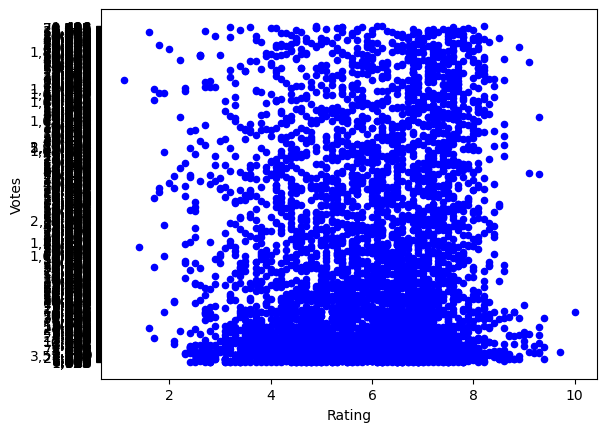

In [20]:
movie_data.plot(kind="scatter",x="Rating",y="Votes",color="Blue")